In [37]:
import numpy as np
import seaborn as sns
from IPython.display import HTML , display
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.spatial import distance_matrix
from skimage import io
from tqdm import tqdm as progress_bar

In [38]:
M = 64 # sequence
propellars_number = 3 # number of propellars
m_values = np.arange(-M //2 , M //2)

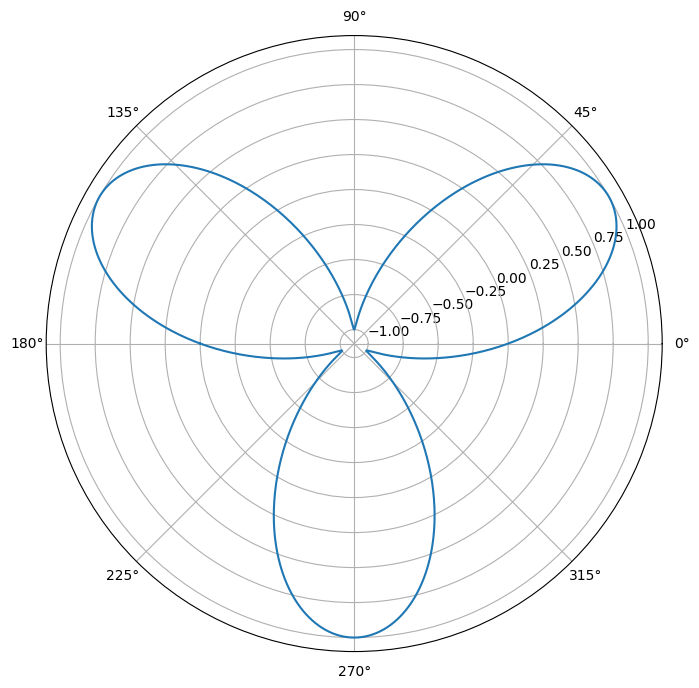

In [39]:
def propellar_sim(alfa,m):
    return np.sin(propellars_number*alfa + m*np.pi/10) #mathematical formula from PDF
alfa = np.linspace(-np.pi,np.pi,1000)
isim = propellar_sim(alfa,m=0)
figure = plt.figure(figsize=[8, 8])
plt.polar(alfa,isim)

In [41]:
def polar_to_cartesian(alfa,r):
    x = r * np.cos(alfa)
    y = r * np.sin(alfa)
    return np.column_stack([x,y]) 

In [42]:
def capture(function: np.array, resolution: int, threshold: float = 0.1, low: float = -1, high: float = 1):
    x_line, y_column = np.meshgrid(np.linspace(low,high,resolution), np.linspace(low,high,resolution))
    grid = np.column_stack([x_line.flatten(), y_column.flatten()])
    distances = distance_matrix(grid, function)
    catch = (np.min(distances, axis = 1) <= threshold).astype(int).reshape(resolution,resolution)
    return catch

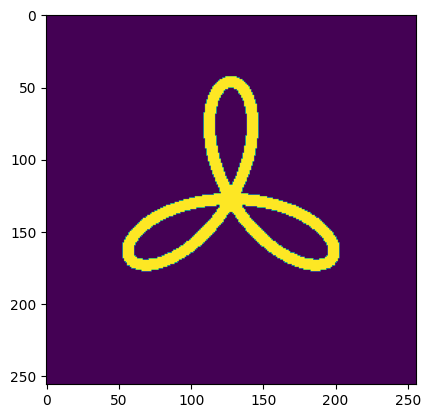

In [43]:
plt.imshow(capture(polar_to_cartesian(alfa, isim), resolution=256, threshold=0.05, low=-np.pi / 2, high=np.pi / 2))

In [44]:
funcs = []
for m in m_values.tolist():
    r = propellar_sim(alfa,m=m)
    func = polar_to_cartesian(alfa,r)
    funcs.append(func)
funcs = np.asarray(funcs)

In [45]:
def recording(funcs: list, capture_kwargs):
    return np.asarray([capture(func, **capture_kwargs) for func in progress_bar(funcs)])

In [46]:
record = recording(funcs, capture_kwargs=dict(resolution = 256, threshold = 0.05, low = -np.pi /2 , high = np.pi/2))
record.shape

100%|██████████| 64/64 [02:50<00:00,  2.67s/it]


(64, 256, 256)

In [47]:
offset = 0
length = 4
capture = np.zeros([256,256])
for frame in record:
    capture[offset: offset + length, :] = frame[offset: offset + length,:]
    offset += length

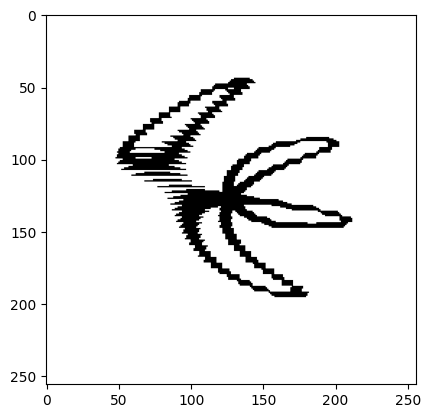

In [48]:
plt.imshow(capture, cmap="Greys")